## Importando bibliotecas
Aqui importaremos bibliotecas básicas para trabalhar com os dados fornecidos, como pandas, numpy, matplotlib, etc.

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Análise inicial
Inicialmente, vamos observar como estão distribuídos os dados em cada .csv. Temos outliers nos nossos datasets? Temos valores nulos/brancos nos datasets? É interessante plotar algum gráfico para visualizar algum padrão ou relação entre variáveis? Essas perguntas são algumas das possíveis para iniciar uma análise simples nos dados que estão nos .csv's.

# Dados de observação
Quais são as colunas? O que elas significam? É interessante identificar o que cada coluna quer dizer para poder facilitar as análises.

#### Observações

O .csv "Observations.csv" tem informações a respeito das observações realizadas em diferentes parques para diferentes espécias. As colunas desse dataset são:

- **scientific_name** - O nome científico de cada espécie
- **park_name** - O nome do parque nacional
- **observations** - O número de observações feitas

In [49]:
observations_data = pd.read_csv('observations.csv')
display(observations_data.head(10))
# Observando quais são os tipos de dados e se há nulos
print(observations_data.info())

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


#### Espécies

O .csv "species_info.csv" tem informações a respeito das espécies contidas nos parques, temos informações a respeito da sua taxonomia, nome científico, nomes típicos (conhecido pela população e que podem diferir de região para região) e o _status_ de conservação do animal. As colunas desse dataset são:

- **category** - A categoria da taxonomia de cada espécie
- **scientific_name** - O nome científico de cada espécie
- **common_names** - O nome popular das espécies
- **conservation_status** - O _status_ de conservação de cada espécie

In [50]:
species_data = pd.read_csv('species_info.csv')
display(species_data.head(10))

# Observando quais são os tipos de dados e se há nulos
print(species_data.info())

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


#### Distribuição de observações
Como estão distribuídas as observações em cada parque?

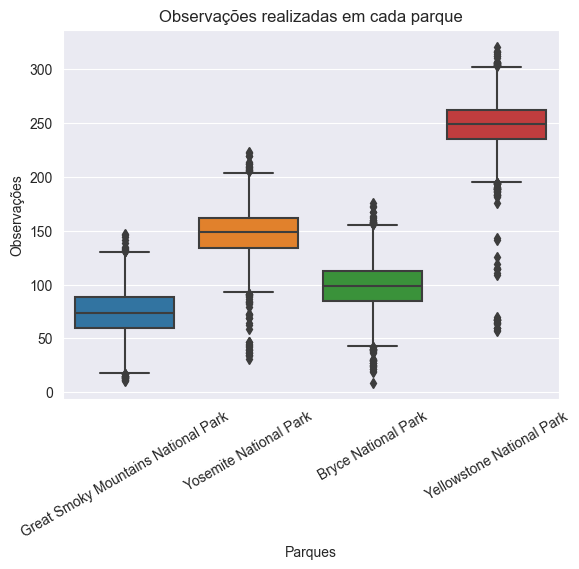

In [51]:
# Como é a distribuição de observações por parques?
sns.boxplot(data=observations_data, x='park_name', y='observations')
plt.xlabel('Parques')
plt.ylabel('Observações')
plt.title('Observações realizadas em cada parque')
plt.xticks(rotation=30)
plt.show()
plt.close()

## Análise dos dados
É interessante descobrir quantos valores únicos temos em cada coluna, pois isso nos dá uma ideia de quais gráficos podem ser produzidos para melhor entendimento dos dados.

scientific_name    5541
park_name             4
observations        304
dtype: int64
category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64
Temos os seguintes tipos taxonômicos: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
O número de animais estão distribuído conforme taxonomia da seguinte maneira:
category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


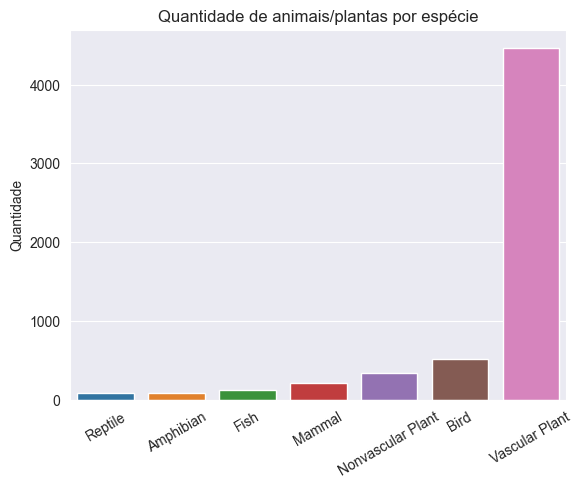

In [52]:
# Quantos valores únicos temos para cada coluna
print(observations_data.nunique())
print(species_data.nunique())

# Quais são os tipos taxonômicos presentes?
print(f"Temos os seguintes tipos taxonômicos: {species_data.category.unique()}")

# E como eles estão distribuídos?
print(f"O número de animais estão distribuído conforme taxonomia da seguinte maneira:\n{species_data.groupby('category').size()}")

# Como é a distribuição de mamíferos pelo seu status de conservação?
category_counts = species_data['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, order=species_data['category'].value_counts(ascending=True).index)
plt.xticks(rotation=30)
plt.ylabel('Quantidade')
plt.title('Quantidade de animais/plantas por espécie')
plt.show()
plt.show()
plt.close()

### Status de conservação

Vamos analisar também a coluna que contém o _status_ de conservação. Logo no início, quando utilizamos o atributo `.head()`, foi possível notar que temos diversos valores NaN. Inclusive, quando fizemos o `.info()` essa informação ficou mais detalhada. É interessante preencher esses valores vazios com alguma característica... mas qual? Vamos inicialmente identificar quais tipos de _status_ de conservação temos.

In [53]:
# Identificando quantos valores nulos temos
print(f"Valores NaN:{species_data.conservation_status.isna().sum()}\n")

print(f"Distribuição do status de conservação:\n{species_data.groupby('conservation_status').size()}")

Valores NaN:5633

Distribuição do status de conservação:
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


Como não temos muita informação a respeito do que significa os valores NaN no _dataset_, vamos inferir que são animais que não necessitam de intervenção ou que estão fora do radar. Podemos substituir tudo que é NaN, por um nome "Out of radar", por exemplo.

In [54]:
species_data = species_data.fillna(value={'conservation_status': 'Out of radar'})

# Confirmando que não temos mais valores em branco
print(f"Valores NaN:{species_data.conservation_status.isna().sum()}\n")
display(species_data.head(10))

Valores NaN:0



,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Out of radar
1,Mammal,Bos bison,"American Bison, Bison",Out of radar
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Out of radar
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Out of radar
4,Mammal,Cervus elaphus,Wapiti Or Elk,Out of radar
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Out of radar
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Out of radar
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


Uma forma bacana de visualizar quem está em observação e sendo possivelmente protegido por um órgão ambiental e quem não está é através de um `.groupby()` e pela criação de uma tabela pivô. Inicialmente, vamos identificar todos os que estão protegidos.

In [55]:
species_data['is_protected'] = species_data.conservation_status != 'Out of radar'

# Criando a tabela pivô
category_counts = species_data.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


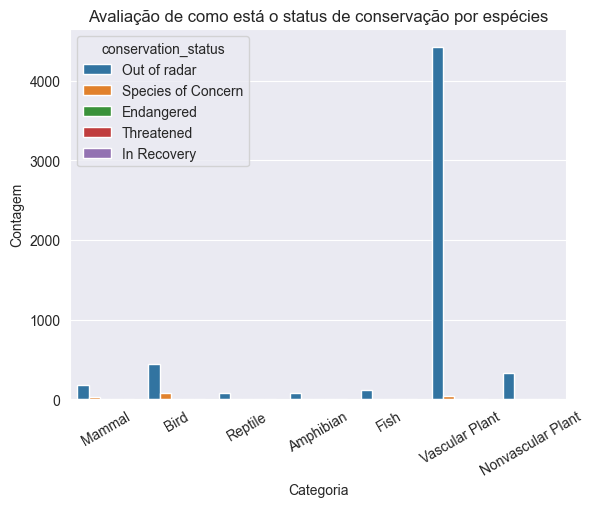

In [56]:
# Como está a situação dos animais em risco de extinção? Tem alguma espécie mais propensa a esse risco?
sns.countplot(data=species_data, x='category', hue='conservation_status')
plt.xticks(rotation=30)
plt.ylabel('Contagem')
plt.xlabel('Categoria')
plt.title('Avaliação de como está o status de conservação por espécies')
plt.show()
plt.close()

## Conclusão
Note que as análises aqui foram básicas, apenas para responder as principais questões que podem surgir dado o conteúdo dos conjuntos de dados trabalhados. O conjunto de dados pode ser trabalhado com a finalidade de obter outras informações como "quantos morcegos, gatos e cães temos nos parques?" e dentre esses tipos "quais estão mais em perigo?". A identificação de palavras pode ser feita através de um tratamento de texto e busca por palavras específicas com o regex.